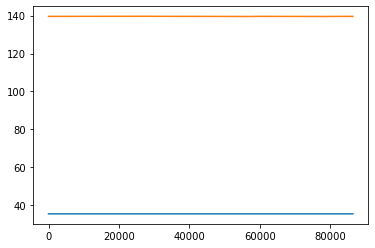

         lat         lng
0  35.456029  139.611249
1  35.456029  139.611249
2  35.456029  139.611249
3  35.456029  139.611249
4  35.456029  139.611249


In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Flatten

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#データ読み込み
dataframe = pandas.read_csv('C:/Users/kinkr/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/1589.csv', usecols=[1,2], engine='python', skipfooter=1)
plt.plot(dataframe)
plt.show()
print(dataframe.head())

In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset_real = dataset[24270:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_real = scaler.fit_transform(dataset_real)

# split into train and test sets
train_size = int(len(dataset_real) * 0.67)
test_size = len(dataset_real) - train_size
train, test = dataset_real[0:train_size,:], dataset_real[train_size:len(dataset_real),:]
print(len(train), len(test))

41626 20503


In [5]:

print(trainX.shape)
print(trainX[7001])

print(trainY.shape)
print(trainY[7000])

(41550, 2, 60)
[[0.8045044  0.80303955 0.80163574 0.8001709  0.79870605 0.7972412
  0.79577637 0.79437256 0.7929077  0.7915039  0.789917   0.78845215
  0.7869873  0.7855835  0.7843628  0.78338623 0.7822876  0.7810669
  0.77978516 0.77856445 0.7774658  0.7764282  0.7751465  0.77368164
  0.7720947  0.7706299  0.76916504 0.76763916 0.7661743  0.7645874
  0.76312256 0.7617798  0.760437   0.7593384  0.7585449  0.7578125
  0.7575073  0.75738525 0.75738525 0.75738525 0.75738525 0.75738525
  0.75738525 0.75738525 0.75738525 0.75738525 0.75738525 0.7573242
  0.75701904 0.7565918  0.7559204  0.755188   0.75439453 0.75354004
  0.7526245  0.7515259  0.7501831  0.74890137 0.7474365  0.7459717 ]
 [0.44555664 0.44543457 0.4453125  0.44506836 0.4449463  0.44482422
  0.44458008 0.44433594 0.44421387 0.44396973 0.4437256  0.44348145
  0.44299316 0.44274902 0.4423828  0.44213867 0.44177246 0.4416504
  0.44189453 0.44250488 0.44274902 0.44299316 0.44348145 0.44384766
  0.44433594 0.44482422 0.44519043 0.4

In [6]:
trainX_trans = trainX.transpose((0, 2, 1))
trainY_trans = trainY.transpose((0, 2, 1))
testX_trans = testX.transpose((0, 2, 1))
testY_trans = testY.transpose((0, 2, 1))

In [8]:
print(trainX_trans.shape)
print(trainY_trans.shape)
print(testX_trans.shape)
print(testY_trans.shape)
print(trainX_trans[0])

(41550, 60, 2)
(41550, 15, 2)
(20427, 60, 2)
(20427, 15, 2)
[[0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.77734375 0.3031006 ]
 [0.7774658  0.3031006 ]
 [0.7776489  0.30322266]
 [0.77770996 0.30322266]
 [0.77789307 0.30322266]
 [0.77801514 0.30322266]
 [0.7782593  0.30334473]
 [0.7786865  0.3034668 ]
 [0.77923584 0.30358887]
 [0.7796631  0.30358887]
 [0.78015137 0.30371094]
 [0.7805786  0.30395508]
 [0.7810669  0.30419922]
 [0.7811279  0.3046875 ]
 [0.7810669  0.30493164]
 [0.7808838  0.30517578]
 [0.7803955  0.30541992]
 [0.7800293  0.30578613]
 [0.77960205 0.3059082 ]
 [0.77874756 0.30603027]
 [0.77789307 0.30603027]
 [0.77716064 0.3059082 ]
 [0.7762451  0.3059082 ]
 [0.77545166 0.30578613]
 [0.77441406 0.30541992]
 [0.77368164 0.30517578]
 [0.77319336 0.30493164]
 [0.77301025 0.

In [15]:
# create and fit the LSTM network
n_outtime = 15
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(trainX_trans.shape[1], trainX_trans.shape[2])))
model.add(RepeatVector(n_outtime))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(2)))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mape'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200)               162400    
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 15, 200)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 15, 200)           320800    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 15, 100)           20100     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 15, 2)             202       
Total params: 503,502
Trainable params: 503,502
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(trainX_trans, trainY_trans, epochs=70, batch_size=16)

Epoch 1/70
 2288/41550 [>.............................] - ETA: 4:51 - loss: 0.0262 - mae: 0.0813 - mape: 56.9576

KeyboardInterrupt: 

In [4]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/ltsm.h5')
loaded_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 200)               162400    
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 1, 200)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 1, 200)            320800    
_________________________________________________________________
time_distributed_15 (TimeDis (None, 1, 100)            20100     
_________________________________________________________________
time_distributed_16 (TimeDis (None, 1, 2)              202       
Total params: 503,502
Trainable params: 503,502
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(testX.shape)
print(testY.shape)

(28481, 30, 2)
(28481, 1, 2)


In [9]:
print(testX[7000])
print(testX[7001])

[[0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.9527588  0.95269775]
 [0.95251465 0.9523926 ]
 [0.95233154 0.95214844]
 [0.95214844 0.95202637]
 [0.95196533 0.95196533]
 [0.95196533 0.95196533]
 [0.95196533 0.95196533]
 [0.95196533 0.95196533]
 [0.95196533 0.95184326]
 [0.9517822  0.95166016]
 [0.95166016 0.95166016]
 [0.37890625 0.37890625]
 [0.37890625 0.37890625]
 [0.37890625 0.37890625]
 [0.37890625 0.37890625]
 [0.37890625 0.37878418]
 [0.37854004 0.37841797]
 [0.37841797 0.3782959 ]
 [0.37817383 0.37817383]
 [0.37805176 0.37805176]
 [0.37805176 0.37805176]
 [0.37805176 0.37805176]
 [0.37805176 0.37805176]
 [0.37805176 0.3779297 ]
 [0.37780762 0.37768555]
 [0.37756348 0.37731934]]
[[0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.9527588  0.9527588 ]
 [0.95269775 0.95251465]
 [0.9523926  0.95233154]
 [0.95214844 0.95214844]
 [0.95202637 0.95196533]
 [0.95196533 0.95196533]
 [0.95196533 0.95196533]

In [6]:
sheed = testX[7000]
sheed = numpy.reshape(sheed, (1,30,2))
prediction = sheed
print(sheed.shape)

(1, 30, 2)


In [7]:
# for i in range(2000):
res = loaded_model.predict(sheed)
sheed = numpy.concatenate((sheed[:,1:,:], res), axis=1)
prediction = numpy.concatenate((prediction,res), axis=1)
print(sheed.shape)
print(prediction)

(1, 30, 2)
[[[0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.95269775]
  [0.95251465 0.9523926 ]
  [0.95233154 0.95214844]
  [0.95214844 0.95202637]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95184326]
  [0.9517822  0.95166016]
  [0.95166016 0.95166016]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37878418]
  [0.37854004 0.37841797]
  [0.37841797 0.3782959 ]
  [0.37817383 0.37817383]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.3779297 ]
  [0.37780762 0.37768555]
  [0.37756348 0.37731934]
  [0.9538946  0.3760368 ]]]


In [9]:
print(prediction)

[[[0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.95269775]
  [0.95251465 0.9523926 ]
  [0.95233154 0.95214844]
  [0.95214844 0.95202637]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95184326]
  [0.9517822  0.95166016]
  [0.95166016 0.95166016]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37878418]
  [0.37854004 0.37841797]
  [0.37841797 0.3782959 ]
  [0.37817383 0.37817383]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.3779297 ]
  [0.37780762 0.37768555]
  [0.37756348 0.37731934]
  [0.9538946  0.3760368 ]]]


In [10]:
res = loaded_model.predict(sheed)
sheed = numpy.concatenate((sheed[:,1:,:], res), axis=1)
prediction = numpy.concatenate((prediction,res), axis=1)
print(sheed.shape)
print(prediction)

(1, 30, 2)
[[[0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.9527588 ]
  [0.9527588  0.95269775]
  [0.95251465 0.9523926 ]
  [0.95233154 0.95214844]
  [0.95214844 0.95202637]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95196533]
  [0.95196533 0.95184326]
  [0.9517822  0.95166016]
  [0.95166016 0.95166016]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37890625]
  [0.37890625 0.37878418]
  [0.37854004 0.37841797]
  [0.37841797 0.3782959 ]
  [0.37817383 0.37817383]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.37805176]
  [0.37805176 0.3779297 ]
  [0.37780762 0.37768555]
  [0.37756348 0.37731934]
  [0.9538946  0.3760368 ]
  [0.83547735 0.73089796]]]


In [7]:
for i in range(20):
    res = loaded_model.predict(sheed)
    sheed = numpy.concatenate((sheed[:,1:,:], res), axis=1)
    prediction = numpy.concatenate((prediction,res), axis=1)

In [8]:
print(prediction.shape)

(1, 50, 2)


In [9]:
prediction = numpy.squeeze(prediction)
testY = numpy.squeeze(testY)

In [10]:
prediction = scaler.inverse_transform(prediction)
testY = scaler.inverse_transform(testY)

In [19]:
testX = numpy.squeeze(testX)
print(testX.shape)
testX = scaler.inverse_transform(testX)

(28481, 30, 2)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [16]:
print(prediction[0:33])
print(testY[6970:7003])

[[ 35.463276 139.68448 ]
 [ 35.463276 139.68448 ]
 [ 35.463276 139.68448 ]
 [ 35.463276 139.68448 ]
 [ 35.463276 139.68446 ]
 [ 35.463264 139.68443 ]
 [ 35.463257 139.6844  ]
 [ 35.46325  139.68439 ]
 [ 35.46324  139.68439 ]
 [ 35.46324  139.68439 ]
 [ 35.46324  139.68439 ]
 [ 35.46324  139.68439 ]
 [ 35.46324  139.68439 ]
 [ 35.463234 139.68436 ]
 [ 35.46323  139.68436 ]
 [ 35.439575 139.6198  ]
 [ 35.439575 139.6198  ]
 [ 35.439575 139.6198  ]
 [ 35.439575 139.6198  ]
 [ 35.439575 139.61978 ]
 [ 35.43956  139.61975 ]
 [ 35.439556 139.61974 ]
 [ 35.439545 139.61972 ]
 [ 35.43954  139.6197  ]
 [ 35.43954  139.6197  ]
 [ 35.43954  139.6197  ]
 [ 35.43954  139.6197  ]
 [ 35.43954  139.61969 ]
 [ 35.43953  139.61966 ]
 [ 35.43952  139.61963 ]
 [ 35.46332  139.61948 ]
 [ 35.45843  139.65948 ]
 [ 35.456722 139.675   ]]
[[ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]
 [ 35.463276 139.6198  ]

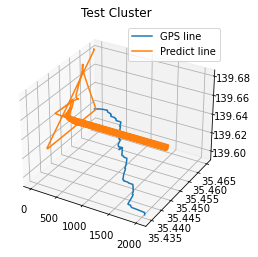

In [13]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(range(2030), testY[7000:9030,0], testY[7000:9030,1], label='GPS line')
ax.plot(range(len(testPredict)), testPredict[:,0], testPredict[:,1], label='Predict line')
ax.legend()
plt.title('Test Cluster')
# plt.savefig("C:/Users/Hailin/OneDrive/ドキュメント/熊大関連/尼崎研/EV-Bus/evBus-main/evBus-main/lstm/LSTM.svg", format="svg")
 
plt.show()

In [14]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    return np.mean(np.abs((y_true - y_pred)/y_true))

error_lat = mean_absolute_percentage_error(testY[7000:9030,0], testPredict[:,0])
error_lon = mean_absolute_percentage_error(testY[7000:9030,1], testPredict[:,1])
print(error_lat)
print(error_lon)

0.00027268266
0.00022566777


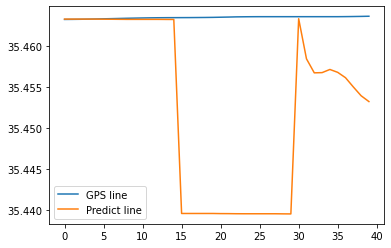

In [18]:
plt.plot(range(40), testY[7000:7040,0], label='GPS line')
plt.plot(range(40), testPredict[0:40,0], label='Predict line')
plt.legend() 
plt.show()

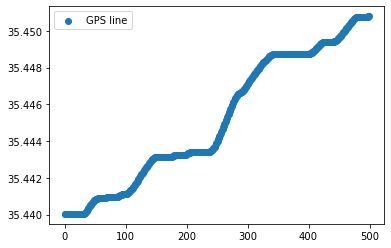

In [28]:
plt.scatter(range(500), testY[700:1200,0], label='GPS line')

plt.legend() 
plt.show()

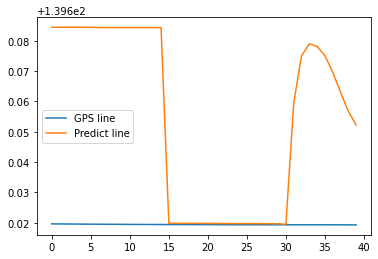

In [30]:
plt.plot(range(40), testY[7000:7040,1], label='GPS line')
plt.plot(range(40), testPredict[0:40,1], label='Predict line')
plt.legend() 
plt.show()

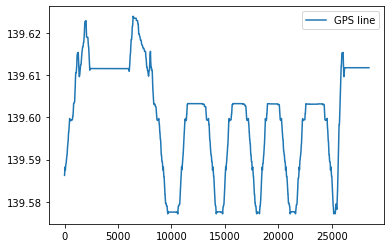

In [19]:
plt.plot(range(len(testY)), testY[:,1], label='GPS line')
plt.legend() 
plt.show()